**Bibliotecas que vamos utilizar**

In [104]:
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

**Criando base**


De forma didatica, os dados que vamos obter terá duas funções: 

- A primeira será linear -> $f(x)= 2x + 3$, e;
- A segunda polimero -> $f(x)= x^{2}-8x+15$.

In [105]:
dados= {"Polimero": [pow(x,2) - 8*x + 15 for x in range(25)],
        "Linear": [2*x + 3 for x in range(25)]}
df= pd.DataFrame(dados)
df.head()

,Polimero,Linear
0,15,3
1,8,5
2,3,7
3,0,9
4,-1,11


**Visualizando dados**

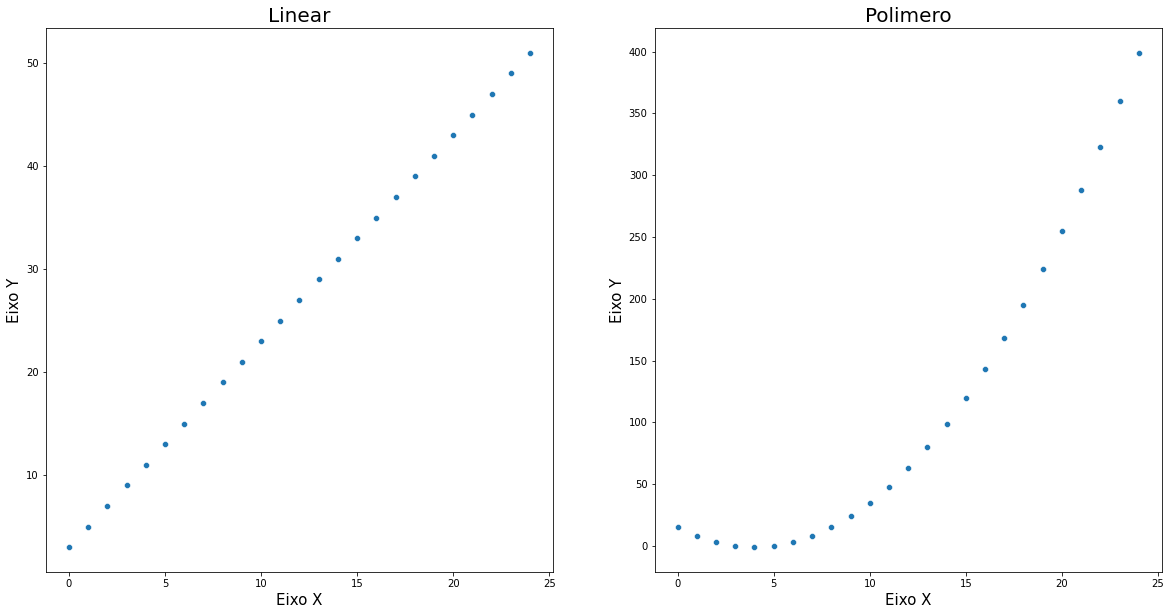

In [106]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

g1= sns.scatterplot(data= df, x= range(0,25), y= "Linear", ax=axes[0])
g1.set_title("Linear", fontsize= 20)
g1.set_xlabel("Eixo X", fontsize= 15)
g1.set_ylabel("Eixo Y", fontsize= 15)

g2= sns.scatterplot(data= df, x= range(0,25), y= "Polimero", ax=axes[1])
g2.set_title("Polimero", fontsize= 20)
g2.set_xlabel("Eixo X", fontsize= 15)
g2.set_ylabel("Eixo Y", fontsize= 15)

plt.show()

**Max-Min**

Nesse primeiro pré processo, vamos utilizar o Max-Min, o modelo transforma os dados de forma que seu resultado seja uma linear. Para conseguimos utilizala, temos a seguinte formula.

$x^{'} = \frac{X - Min_{base}}{Max_{base}-Min_{base}}(NovoMax - NovoMax) + NovoMin$

$X$= Valor atual para a transformação

$x^{'}$ = Valor atualizado

$Min_{base}$= Menor numero base de dados

$Max_{base}$= Maior numero na base de dados

$NovoMax$= Novo maior numerona base de dados

$NovoMin$= Novo menor numerona base de dados


In [107]:
def min_max(lista, novo_min= 0, novo_max= 1):
  lista_nova= []
  maior_numero= max(lista)
  menor_numero= min(lista)

  for x in lista:
    x_novo= ((x - menor_numero) / (maior_numero - menor_numero)) * (novo_max - novo_min) + novo_min
    lista_nova.append(x_novo)
  
  return(lista_nova)

In [108]:
novo_Linear= min_max(df['Linear'].to_list())
novo_Polimero= min_max(df['Polimero'].to_list())

**Comparar os valores atualizados com os antigos**

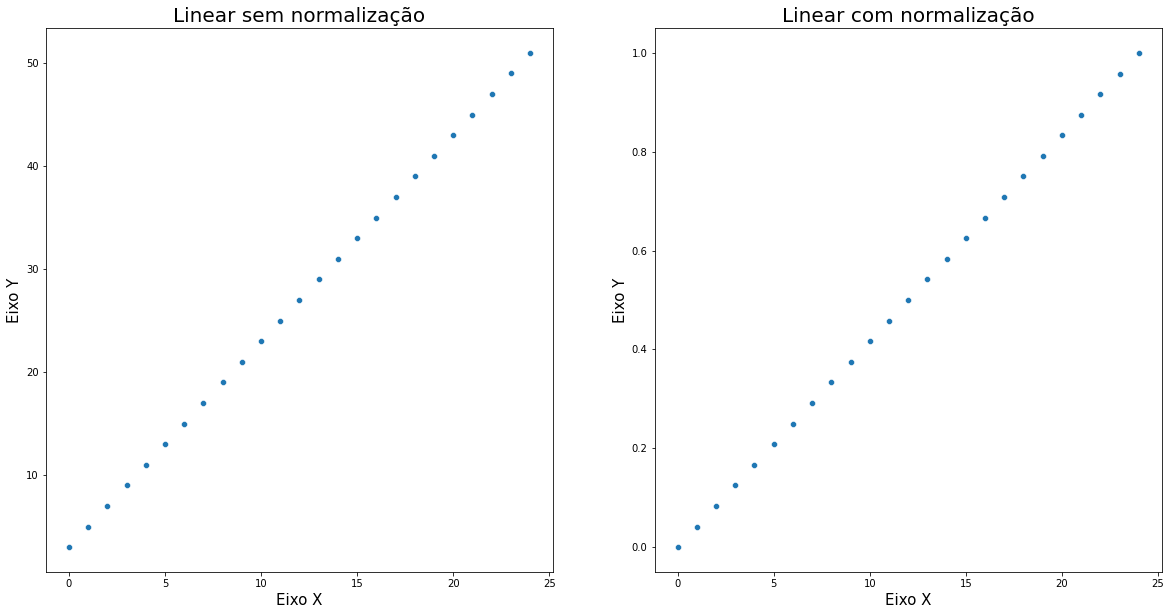

In [109]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

g1= sns.scatterplot(data= df, x= range(0,25), y= "Linear", ax=axes[0])
g1.set_title("Linear sem normalização", fontsize= 20)
g1.set_xlabel("Eixo X", fontsize= 15)
g1.set_ylabel("Eixo Y", fontsize= 15)

g2= sns.scatterplot(data= novo_Linear, ax=axes[1])
g2.set_title("Linear com normalização", fontsize= 20)
g2.set_xlabel("Eixo X", fontsize= 15)
g2.set_ylabel("Eixo Y", fontsize= 15)

plt.show()

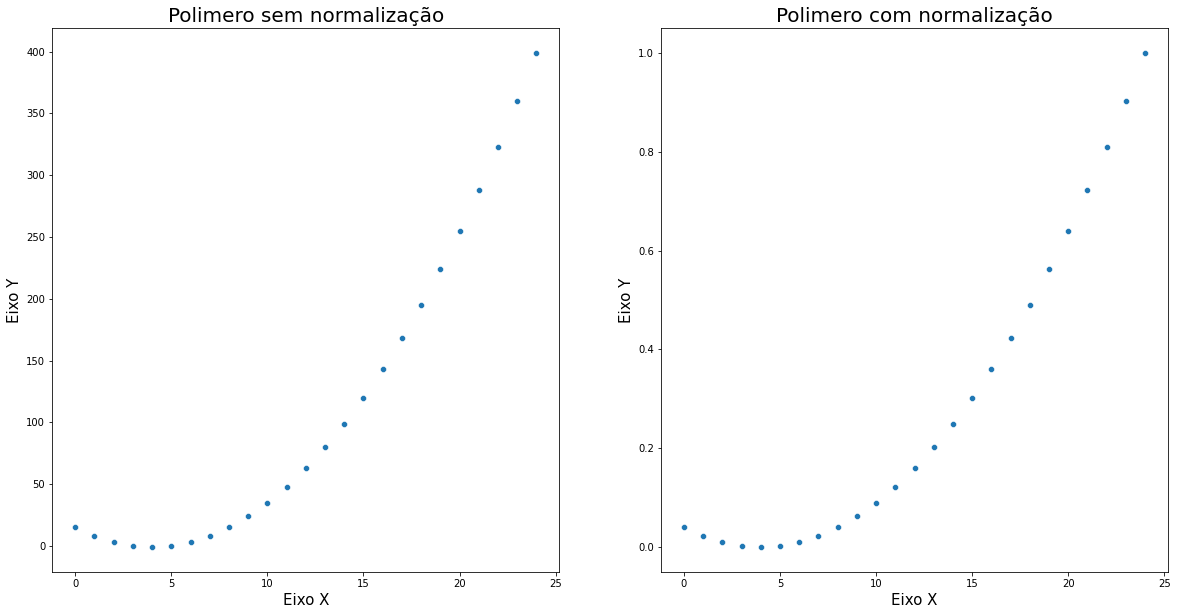

In [110]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

g1= sns.scatterplot(data= df, x= range(0,25), y= "Polimero", ax=axes[0])
g1.set_title("Polimero sem normalização", fontsize= 20)
g1.set_xlabel("Eixo X", fontsize= 15)
g1.set_ylabel("Eixo Y", fontsize= 15)

g2= sns.scatterplot(data= novo_Polimero, ax=axes[1])
g2.set_title("Polimero com normalização", fontsize= 20)
g2.set_xlabel("Eixo X", fontsize= 15)
g2.set_ylabel("Eixo Y", fontsize= 15)

plt.show()

**Utiliizando Sklearn**

In [125]:
from sklearn.preprocessing import MinMaxScaler

modelo_min_max= MinMaxScaler((0,1))

novo_df= pd.DataFrame(modelo_min_max.fit_transform(df)).rename({0:"Polimero", 1: "Linear"}, axis= 1)
novo_df.head()

,Polimero,Linear
0,0.0400,0.000000
1,0.0225,0.041667
2,0.0100,0.083333
3,0.0025,0.125000
4,0.0000,0.166667


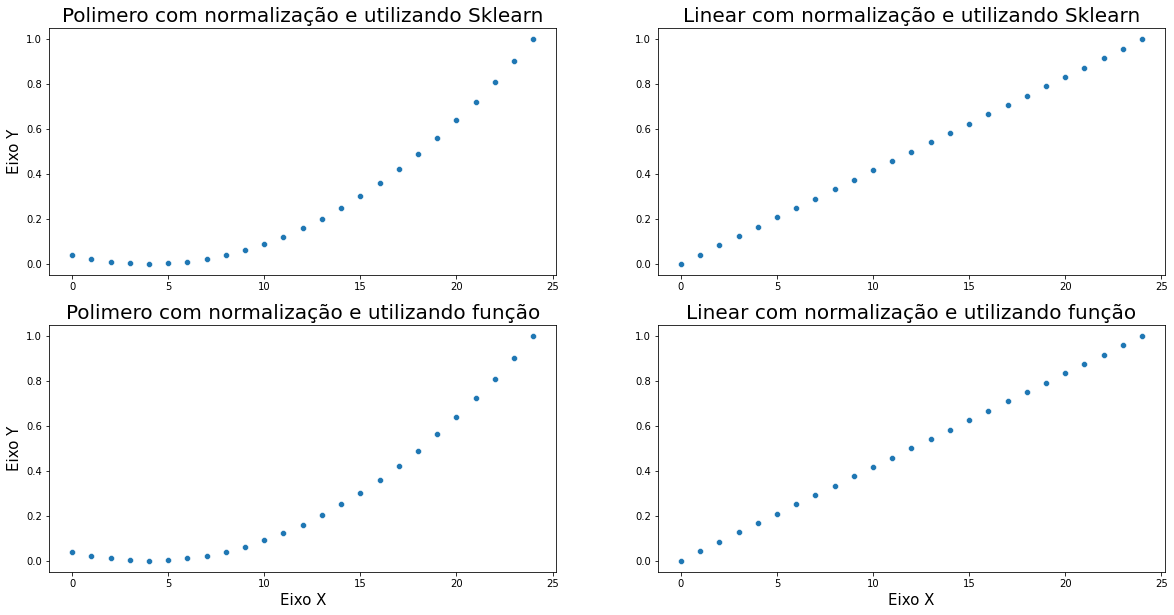

In [129]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

g1= sns.scatterplot(data= novo_df, x= range(0,25), y= "Polimero", ax=axes[0,0])
g1.set_title("Polimero com normalização e utilizando Sklearn", fontsize= 20)
g1.set_ylabel("Eixo Y", fontsize= 15)

g2= sns.scatterplot(data= novo_Polimero, ax=axes[1,0])
g2.set_title("Polimero com normalização e utilizando função", fontsize= 20)
g2.set_xlabel("Eixo X", fontsize= 15)
g2.set_ylabel("Eixo Y", fontsize= 15)

g3= sns.scatterplot(data= novo_df, x= range(0,25), y= "Linear", ax=axes[0,1])
g3.set_title("Linear com normalização e utilizando Sklearn", fontsize= 20)
g3.set_ylabel("", fontsize= 15)

g4= sns.scatterplot(data= novo_Linear, ax=axes[1,1])
g4.set_title("Linear com normalização e utilizando função", fontsize= 20)
g4.set_xlabel("Eixo X", fontsize= 15)
g4.set_ylabel("", fontsize= 15)

plt.show()